# Visualize Interpretation Approach for GTEx Blood Features

**Gregory Way, 2018**

Visualizing the interpretation of compression results across two VAE models.

In [1]:
library(ggplot2)
library(ggrepel)
suppressPackageStartupMessages(library(dplyr))

## Visualize the Compression Interpretation Implementation

In [2]:
results_file <- file.path('results', 'gtex_vae_example_interpret_compression.tsv')
interpret_data_df <- (
    readr::read_tsv(results_file,
                    col_types = readr::cols(.default = readr::col_character(),
                                            value = readr::col_double(),
                                            z_score = readr::col_double()))
    )

interpret_data_df$index <- factor(interpret_data_df$index,
                                  levels = c("vae_0_two", "vae_1_two", "vae_0_three",
                                             "vae_1_three", "vae_2"))

head(interpret_data_df)

Warning message:
“Missing column names filled in: 'X1' [1]”

X1,model_type,index,variable,value,z_score
718,real,vae_0_two,Keratinocytes_FANTOM_2,-13.218404,-52.06130
1347,real,vae_1_three,Neutrophils_IRIS_1,-2.721579,-42.54428
2086,real,vae_2,Chondrocytes_HPCA_2,-1.338505,-33.23243
2323,real,vae_2,Neutrophils_HPCA_2,-3.145218,-25.50371
229,real,vae_0_three,Keratinocytes_FANTOM_2,-5.534262,-24.15808
721,real,vae_0_two,Keratinocytes_HPCA_2,-9.824761,-23.60526


In [3]:
color_logic <- (interpret_data_df$z_score > 20 | interpret_data_df$z_score < -20)

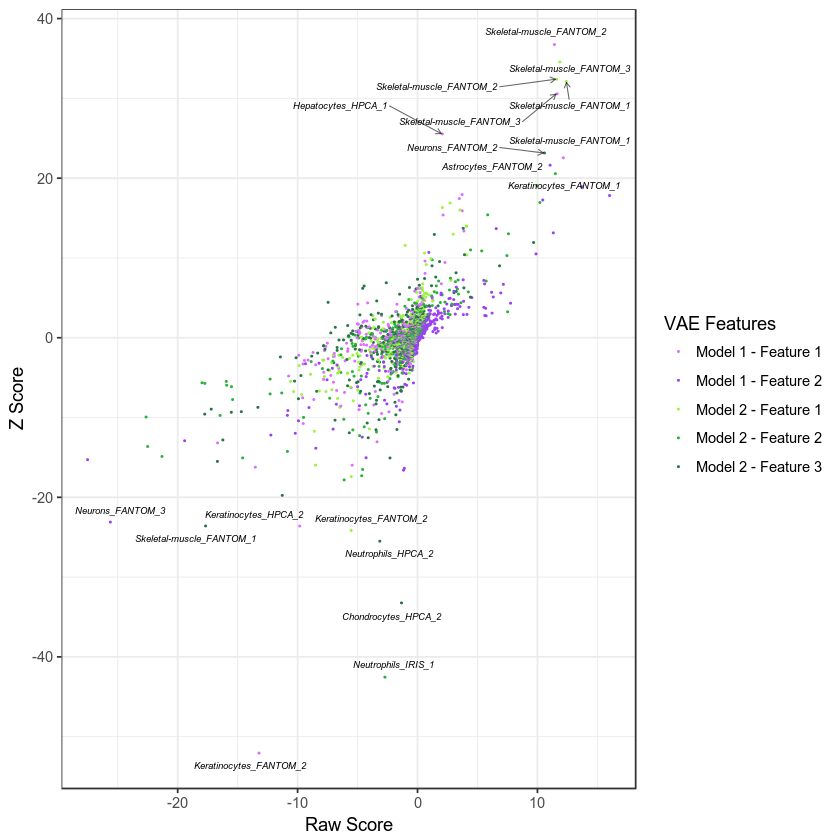

In [4]:
ggplot(interpret_data_df, aes(x=value, y=z_score)) +
  geom_point(aes(color=index), size = 0.2) +
  scale_color_manual(name = "VAE Features",
                     values = c("#db70ff", "#9b41f4", "#9af441", "#29b239",
                                "#277544"),
                     labels = c("vae_0_two" = "Model 1 - Feature 1",
                                "vae_1_two" = "Model 1 - Feature 2",
                                "vae_0_three" = "Model 2 - Feature 1",
                                "vae_1_three" = "Model 2 - Feature 2",
                                "vae_2" = "Model 2 - Feature 3")) +
  geom_text_repel(data = subset(interpret_data_df, color_logic),
                  arrow = arrow(length = unit(0.01, "npc")),
                  segment.size = 0.3,
                  segment.alpha = 0.6,
                  size = 2,
                  fontface = "italic",
                  point.padding = 0.1,
                  aes(x = value, y = z_score, label = variable)) +
  xlab("Raw Score") +
  ylab("Z Score") +
  theme_bw()

fig_file <- file.path("figures", "interpret_compression_vae_neutrophils.png")
ggsave(fig_file, height = 4.5, width = 6, dpi = 500)

## Visualize the Overrepresentation results

In [5]:
results_file <- file.path('results', 'gtex_vae_example_overrepresentation.tsv')
overrep_data_df <- (
    readr::read_tsv(results_file,
                    col_types = readr::cols(.default = readr::col_integer(),
                                            X1 = readr::col_character(),
                                            feature = readr::col_character(),
                                            odds = readr::col_double(),
                                            pval = readr::col_double(),
                                            tailed = readr::col_character()))
    )

overrep_data_df$feature <- factor(overrep_data_df$feature,
                                  levels = c("vae_0_two", "vae_1_two", "vae_0_three",
                                             "vae_1_three", "vae_2"))

overrep_data_df$neg_log10_p <- -log10(overrep_data_df$pval)
head(overrep_data_df %>% dplyr::arrange(desc(neg_log10_p)))

Warning message:
“Missing column names filled in: 'X1' [1]”

X1,pval,odds,feature,tailed,neg_log10_p
Skeletal-muscle_FANTOM_2,9.246131e-59,112.53253,vae_0_three,pos,58.03404
Skeletal-muscle_FANTOM_3,1.583445e-57,90.84299,vae_0_three,pos,56.80040
Skeletal-muscle_FANTOM_2,6.785017e-57,100.98621,vae_0_two,pos,56.16845
Skeletal-muscle_FANTOM_1,7.953908e-54,62.44907,vae_0_three,pos,53.09942
Skeletal-muscle_FANTOM_3,9.978369e-54,76.37931,vae_0_two,pos,53.00094
Skeletal-muscle_FANTOM_1,3.764866e-50,53.01898,vae_0_two,pos,49.42425


In [6]:
color_logic <- overrep_data_df$neg_log10_p > 11

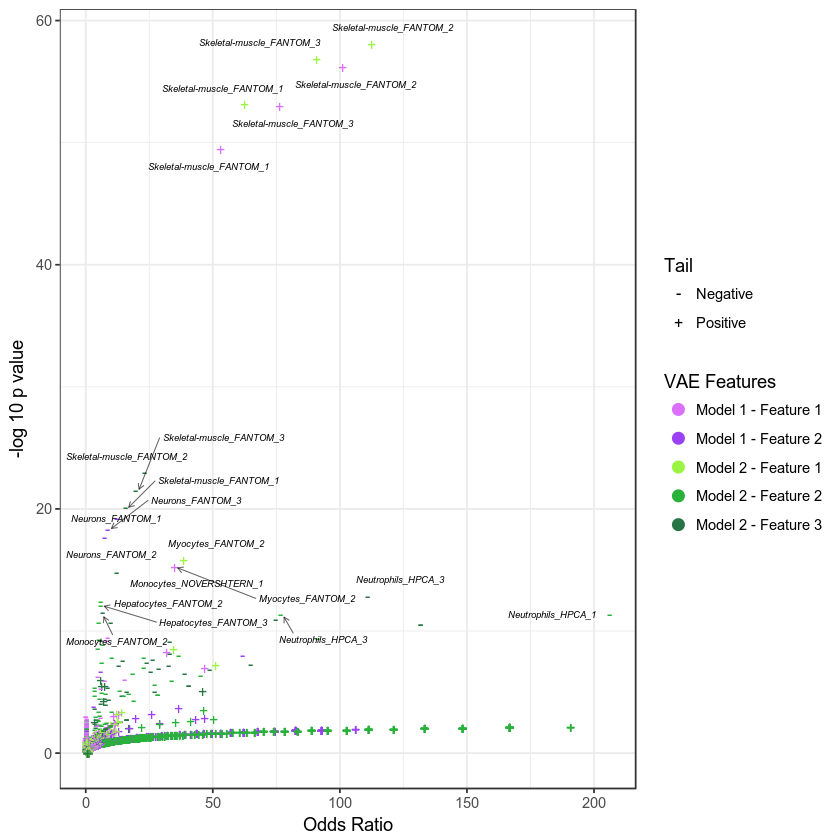

In [7]:
ggplot(overrep_data_df, aes(x = odds, y = neg_log10_p, shape = tailed)) +
  geom_point(aes(color=as.factor(feature)), size = 3) +
  scale_color_manual(name = "VAE Features",
                     values = c("#db70ff", "#9b41f4", "#9af441", "#29b239",
                                "#277544"),
                     labels = c("vae_0_two" = "Model 1 - Feature 1",
                                "vae_1_two" = "Model 1 - Feature 2",
                                "vae_0_three" = "Model 2 - Feature 1",
                                "vae_1_three" = "Model 2 - Feature 2",
                                "vae_2" = "Model 2 - Feature 3")) +
  scale_shape_manual(name = "Tail",
                     values = c("-", "+"),
                     labels = c("pos" = "Positive",
                                "neg" = "Negative")) +
  geom_text_repel(data = subset(overrep_data_df, color_logic),
                  arrow = arrow(length = unit(0.01, "npc")),
                  segment.size = 0.3,
                  segment.alpha = 0.6,
                  size = 2,
                  fontface = "italic",
                  point.padding = 0.3,
                  aes(x = odds, y = neg_log10_p, label = X1)) +
  xlab("Odds Ratio") +
  ylab("-log 10 p value") +
  theme_bw()

fig_file <- file.path("figures", "interpret_compression_vae_neutrophils_tailed.png")
ggsave(fig_file, height = 4, width = 6, dpi = 500)

## Compare BioBombe Network Projection Approach with Overrepresentation

### Combine Results and Plot in Single Figure

In [8]:
combined_results_df <- overrep_data_df %>%
    dplyr::full_join(interpret_data_df, by = c('X1' = 'variable', 'feature' = 'index'))

head(combined_results_df)

X1,pval,odds,feature,tailed,neg_log10_p,X1.y,model_type,value,z_score
Skeletal-muscle_FANTOM_2,9.246131e-59,112.53253,vae_0_three,pos,58.03404,409,real,11.59940,32.40625
Skeletal-muscle_FANTOM_3,1.583445e-57,90.84299,vae_0_three,pos,56.80040,410,real,11.87491,34.56985
Skeletal-muscle_FANTOM_2,6.785017e-57,100.98621,vae_0_two,pos,56.16845,898,real,11.41025,36.74580
Skeletal-muscle_FANTOM_1,7.953908e-54,62.44907,vae_0_three,pos,53.09942,408,real,12.40674,32.14147
Skeletal-muscle_FANTOM_3,9.978369e-54,76.37931,vae_0_two,pos,53.00094,899,real,11.63737,30.57257
Skeletal-muscle_FANTOM_1,3.764866e-50,53.01898,vae_0_two,pos,49.42425,897,real,12.15134,22.55350


In [9]:
color_logic <- (combined_results_df$z_score > 20 | combined_results_df$z_score < -20)

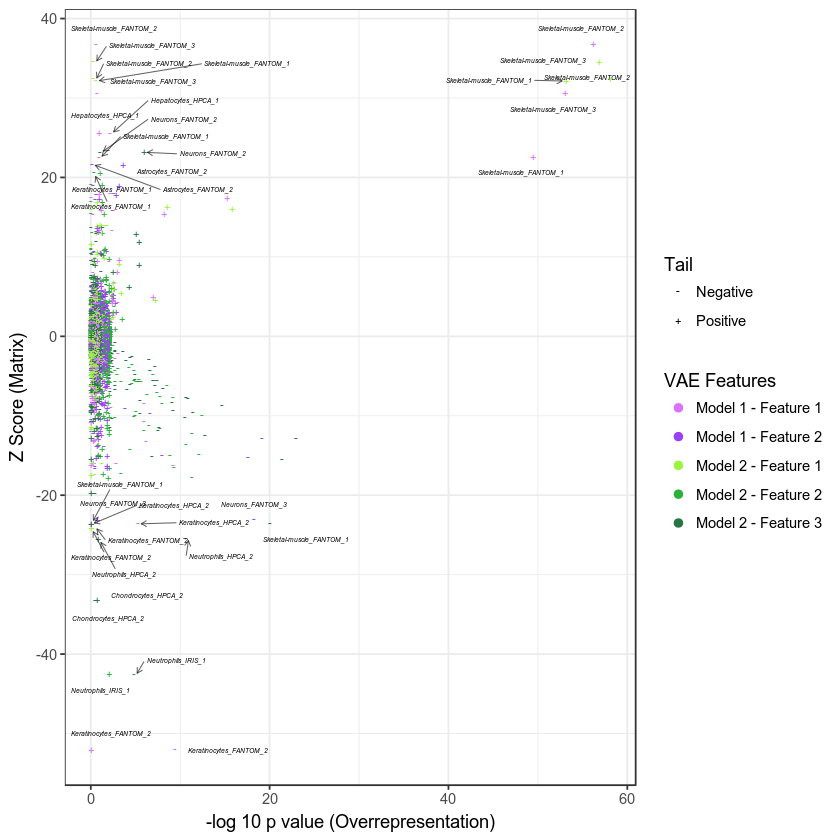

In [10]:
ggplot(combined_results_df,
       aes(x = neg_log10_p,
           y = z_score,
           shape = tailed)) +
  geom_point(aes(color = as.factor(feature)), size = 2) +
  scale_color_manual(name = "VAE Features",
                     values = c("#db70ff", "#9b41f4", "#9af441", "#29b239",
                                "#277544"),
                     labels = c("vae_0_two" = "Model 1 - Feature 1",
                                "vae_1_two" = "Model 1 - Feature 2",
                                "vae_0_three" = "Model 2 - Feature 1",
                                "vae_1_three" = "Model 2 - Feature 2",
                                "vae_2" = "Model 2 - Feature 3")) +
  scale_shape_manual(name = "Tail",
                     values = c("-", "+"),
                     labels = c("pos" = "Positive",
                                "neg" = "Negative")) +
  geom_text_repel(data = subset(combined_results_df, color_logic),
                  arrow = arrow(length = unit(0.01, "npc")),
                  segment.size = 0.3,
                  segment.alpha = 0.6,
                  size = 1.4,
                  fontface = "italic",
                  point.padding = 0.3,
                  aes(x = neg_log10_p, y = z_score, label = X1)) +
  ylab("Z Score (Matrix)") +
  xlab("-log 10 p value (Overrepresentation)") +
  theme_bw()

fig_file <- file.path("figures", "full_comparison_vae_neutrophils_tailed.png")
ggsave(fig_file, height = 4, width = 6, dpi = 500)